# <center> Case study: Survival classification with Titanic dataset </center>

## 1. Quick reviews
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Logistic Regression, Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 2. Titanic dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons for the sinking of the Titanic was the lack of supplies and medical expertise. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data as explained below:

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

The goal is to predict if a passenger survived the sinking of the Titanic or not (`survived`), regarding the passenger’s attributes. 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and quick view data

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [4]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [5]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
data.drop(['class','embark_town','alive'],axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

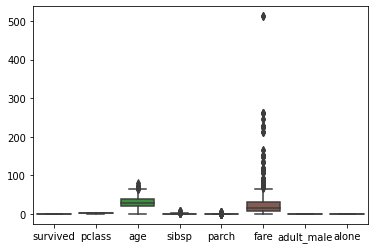

In [8]:
sns.boxplot(data=data)

<AxesSubplot:>

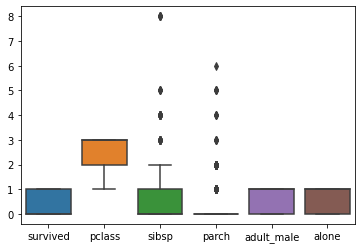

In [9]:
sns.boxplot(data=data.drop(['age','fare'],axis=1))

https://www.youtube.com/watch?v=vcbMinm_1Q8

In [10]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [36]:
#Problem: data is imbalance

1.5 IQR Rule

# EDA

## Descriptive analysis

In [11]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.select_dtypes(exclude=['int64','float64']).describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


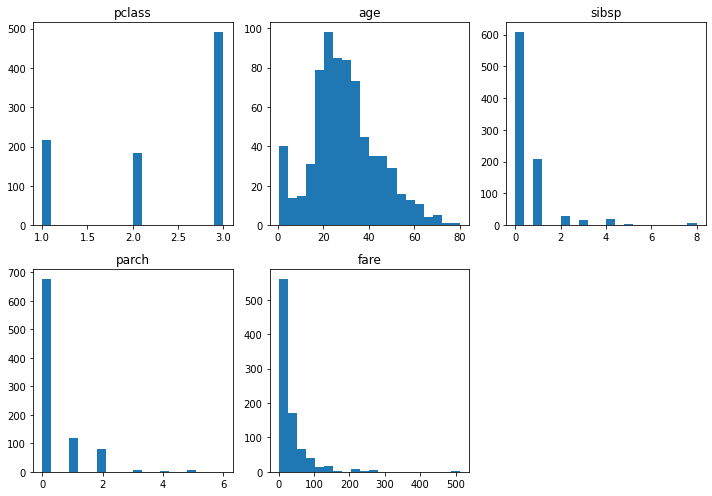

In [13]:
df_num = data.select_dtypes(['int64','float64']).drop('survived',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(int(nrows), int(ncols), i + 1)
    df_num[c].plot.hist(bins=20, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

## Diagnostic Analysis

In [18]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
pivot_class = pd.pivot_table(data=data,index='pclass',columns='survived',values='who',aggfunc='count').reset_index()
pivot_class

survived,pclass,0,1
0,1,80,136
1,2,97,87
2,3,372,119


<AxesSubplot:xlabel='pclass'>

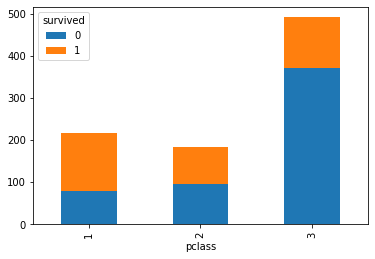

In [20]:
pivot_class.plot(x='pclass',kind='bar',stacked = True)

<AxesSubplot:xlabel='sex'>

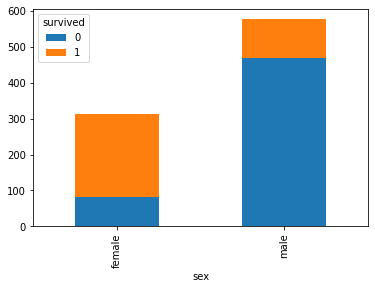

In [15]:
pivot_sex = pd.pivot_table(data=data,index='sex',columns='survived',values='who',aggfunc='count').reset_index()
pivot_sex.plot(x='sex',kind='bar',stacked = True)

<AxesSubplot:xlabel='embarked'>

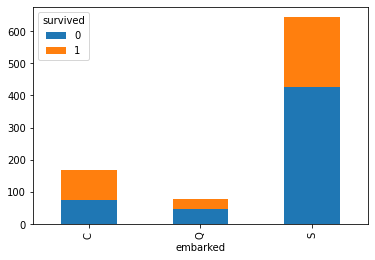

In [16]:
pivot_embarked = pd.pivot_table(data=data,index='embarked',columns='survived',values='who',aggfunc='count').reset_index()
pivot_embarked.plot(x='embarked',kind='bar',stacked = True)

<AxesSubplot:xlabel='alone'>

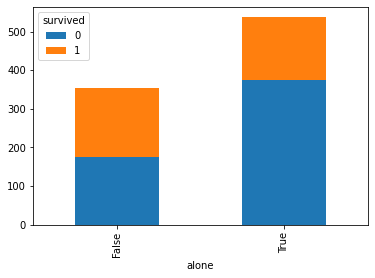

In [22]:
pivot_alone = pd.pivot_table(data=data,index='alone',columns='survived',values='who',aggfunc='count').reset_index()
pivot_alone.plot(x='alone',kind='bar',stacked = True)

<AxesSubplot:xlabel='adult_male'>

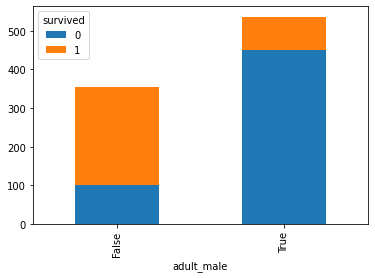

In [23]:
pivot_adult_male = pd.pivot_table(data=data,index='adult_male',columns='survived',values='who',aggfunc='count').reset_index()
pivot_adult_male.plot(x='adult_male',kind='bar',stacked = True)

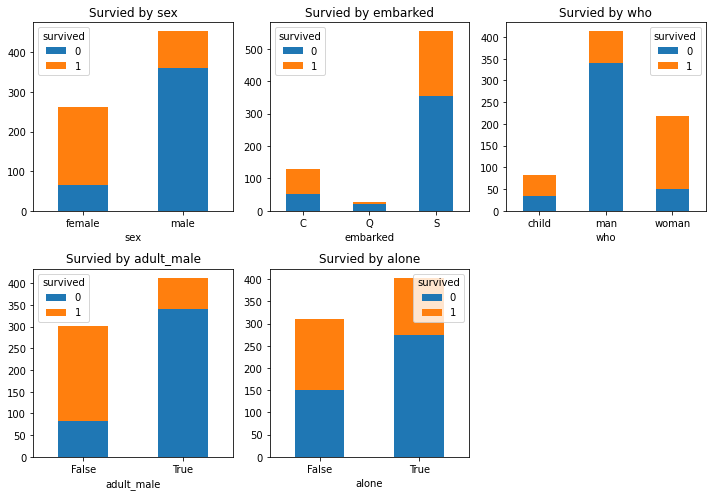

In [17]:
df = data[['sex','embarked','who','adult_male','alone']]
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(int(nrows), int(ncols), i + 1)
    tmp = pd.pivot_table(data=data,index=c,columns='survived',values='age',aggfunc='count').reset_index()
    tmp.plot(x=c,kind='bar',stacked=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
    plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [66]:
'''
1 là gì
'''

'\n1 là gì\n'

In [67]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

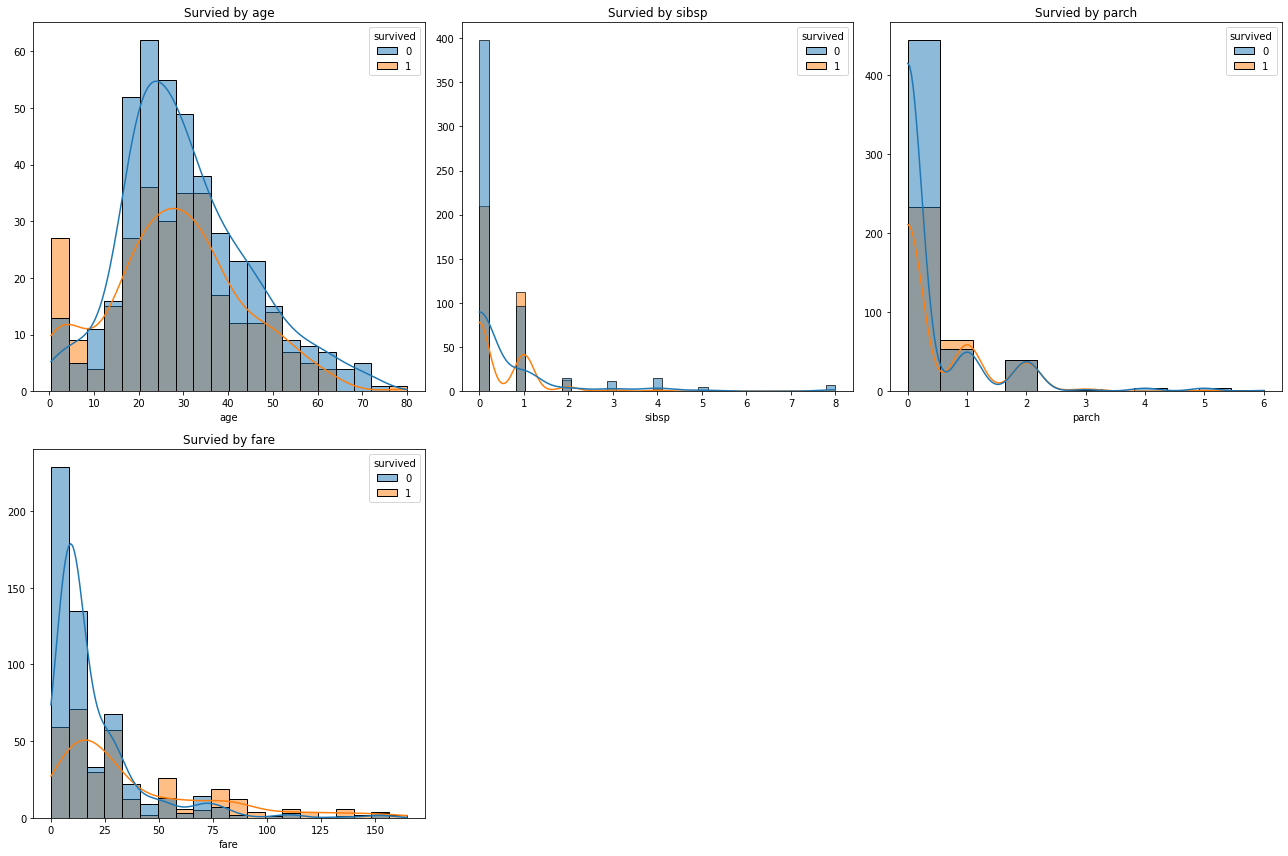

In [25]:
df = data[['age', 'sibsp', 'parch', 'fare']]
# Figure
fig = plt.figure(figsize=(18, 12))

# Define grid
ncols = 3
nrows = np.ceil(df.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(int(nrows), int(ncols), i + 1)
    if c != 'fare':
        sns.histplot(data=data,x=c,hue='survived',kde=True,ax=ax)
    else:
        sns.histplot(data=data[data['fare']<=200],x=c,hue='survived',bins=20,kde=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
#     plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [26]:
# titanic_stats = titanic.survived.value_counts()
# plt.figure(figsize = (6,6))
# plt.pie(titanic_stats, labels = titanic_stats.index, autopct = '%.2f', explode=[0,0.05], shadow=True)
# plt.title('Pie chart about survival rate')
# plt.legend()
# plt.show()

# Data preprocessing

## Handle Missing Values

### Age

- Easy imputation: mean, median, mode
- Domain imputation: 

In [30]:
## Easy imputation

<AxesSubplot:xlabel='age', ylabel='Count'>

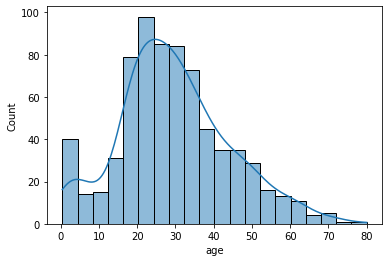

In [18]:
sns.histplot(data=data,x='age',kde=True)

In [19]:
data['age'].mean()

29.69911764705882

In [73]:
data['age'].median()

28.0

In [75]:
agefill = data['age'].fillna(data['age'].median())
agefill.isna().sum()

0

<AxesSubplot:xlabel='age', ylabel='Count'>

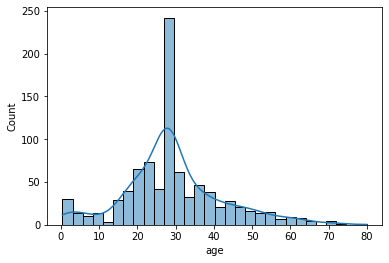

In [20]:
sns.histplot(data=data[['age']].fillna(data['age'].median()),x='age',kde=True)


In [23]:
from sklearn.impute import SimpleImputer

In [37]:
# sip = SimpleImputer(strategy='median')
# sip.fit_transform(data[['age']])

In [38]:
## Domain imputation

In [29]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [31]:
data.groupby('pclass',as_index=False)['age'].mean()

,pclass,age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [32]:
data.groupby('sex',as_index=False)['age'].mean()

,sex,age
0,female,27.915709
1,male,30.726645


In [36]:
data.groupby('adult_male',as_index=False)['age'].mean()

,adult_male,age
0,False,24.932458
1,True,33.173123


In [37]:
data.groupby('alone',as_index=False)['age'].mean()

,alone,age
0,False,26.413452
1,True,32.220297


In [38]:
 data.groupby('who',as_index=False)['age'].mean()

,who,age
0,child,6.369518
1,man,33.173123
2,woman,32.000000


In [39]:
 data.groupby('alive',as_index=False)['age'].mean()

,alive,age
0,no,30.626179
1,yes,28.343690


In [21]:
data.groupby(['who','sibsp','parch'])['age'].agg([len,'mean',lambda x: x.isna().sum()/len(x)*100]).reset_index()


,who,sibsp,parch,len,mean,<lambda_0>
0,child,0,0,6,12.166667,0.000000
1,child,0,1,8,6.052500,0.000000
2,child,0,2,9,4.981111,0.000000
3,child,1,0,5,13.900000,0.000000
4,child,1,1,15,4.566667,0.000000
5,child,1,2,7,5.274286,0.000000
6,child,2,1,5,2.300000,0.000000
7,child,2,2,1,9.000000,0.000000
8,child,3,1,3,4.333333,0.000000
9,child,3,2,4,6.250000,0.000000


### Embarked

### Deck

## 2. Outliers

- **Trimming**: easier
- **Capping**

##### Trimming

##### Capping

In [60]:
# IQR = 75% (q3) - 25% (q1)
# 75% + 1.5IQR
# 25% - 1.5IQR

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
plt.title('kde before capping')
sns.kdeplot(data=data['fare'])

plt.subplot(2,2,2)
plt.title('boxplot before capping')
sns.boxplot(data=data['fare'])

plt.subplot(2,2,3)
plt.title('kde after capping')
sns.kdeplot(data=fare_new['fare_new'])

plt.subplot(2,2,4)
plt.title('boxplot after capping')
sns.boxplot(data=fare_new['fare_new'])

## 3. Scale data

# Standard Scaler
![](https://i.stack.imgur.com/Yr42l.png)

# MinMax Scaler
![](https://androidkt.com/wp-content/uploads/2020/10/Selection_060.png)

# Robust Scaler
![](https://i.stack.imgur.com/G3V7C.png)

# Distribution after scaling
![](https://curiousily.com/static/c9cf00949c60d2eacb1fb27d24d1544d/3e3fe/scaling-overview.png)

![](https://miro.medium.com/max/1400/1*A9d4SEX0t_bAAPzZeVqwAQ.png)

In [22]:
from sklearn.preprocessing import StandardScaler

## 4. Feature transformation

In [68]:
# Age [0,100] -> group 5 nhom
# pd.qcut() pd.cut()

<AxesSubplot:xlabel='age', ylabel='Count'>

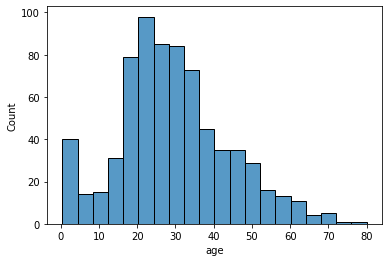

In [25]:
sns.histplot(data=data['age'])

In [27]:
age_range = [0,15,25,45,60,80,100]
data['age_range']=pd.cut(data['age'],bins=age_range)
data[['age','age_range']]

,age,age_range
0,22.0,"(15.0, 25.0]"
1,38.0,"(25.0, 45.0]"
2,26.0,"(25.0, 45.0]"
3,35.0,"(25.0, 45.0]"
4,35.0,"(25.0, 45.0]"
...,...,...
886,27.0,"(25.0, 45.0]"
887,19.0,"(15.0, 25.0]"
888,NaN,NaN
889,26.0,"(25.0, 45.0]"


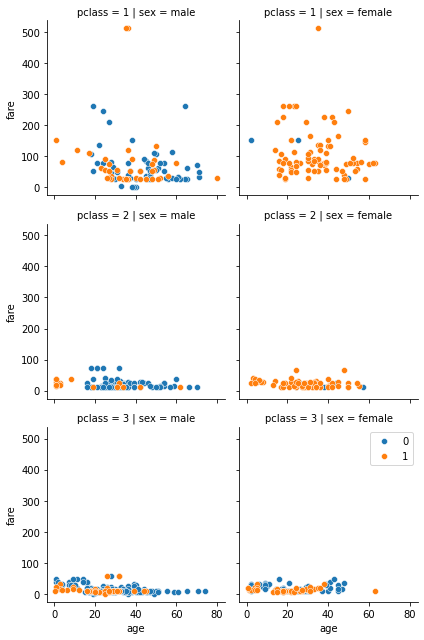

In [3]:
grid = sns.FacetGrid(data=data,row='pclass',col='sex',hue='survived')
grid.map(sns.scatterplot,'age','fare')
plt.legend(loc='upper right')
plt.show()


## 5. Imbalanced labels

In [ ]:
- Before:
    + Down sampling
    + Up sampling
    + Robust sampling
- Inside:
    param: 
        class_weighted (), imbalanced